##SUMMARY
Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('/Users/drram/Documents/train_agriculture.xlsx', encoding="utf8")
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
test= pd.read_excel('/Users/drram/Documents/test_agriculture.xlsx')
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [4]:
train.shape

(4599, 10)

In [5]:
test.shape

(1199, 9)

In [6]:
train.columns
#"crop_damage" is the only differnt column

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [7]:
test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [8]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [10]:
train["Crop_Damage"]

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4599, dtype: int64

In [11]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [12]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [13]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [14]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

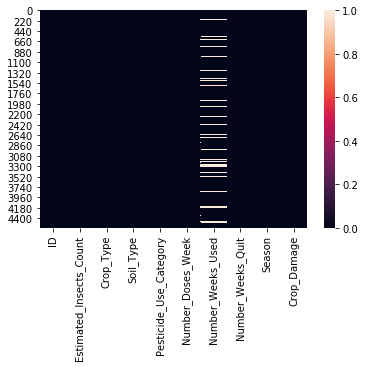

In [15]:
sns.heatmap(train.isnull())

In [16]:
#checking the unique values in the dataset
#training dataset
for i in train.columns:
    print(train[i].value_counts())
    print()

F00007466    1
F00002559    1
F00001348    1
F00003218    1
F00006101    1
            ..
F00002699    1
F00004814    1
F00007696    1
F00004398    1
F00006803    1
Name: ID, Length: 4599, dtype: int64

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64

0    3565
1    1034
Name: Crop_Type, dtype: int64

0    2407
1    2192
Name: Soil_Type, dtype: int64

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64

20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtyp

In [17]:
#checking the unique values in the dataset
#test dataset
for i in test.columns:
    print(test[i].value_counts())
    print()

F00001907    1
F00002486    1
F00001901    1
F00001588    1
F00002695    1
            ..
F00002169    1
F00002799    1
F00000101    1
F00000907    1
F00001913    1
Name: ID, Length: 1199, dtype: int64

1132    58
915     49
1056    48
1385    47
851     45
        ..
3896     2
257      2
3515     2
3336     1
4096     1
Name: Estimated_Insects_Count, Length: 70, dtype: int64

0    966
1    233
Name: Crop_Type, dtype: int64

0    653
1    546
Name: Soil_Type, dtype: int64

2    695
3    482
1     22
Name: Pesticide_Use_Category, dtype: int64

20    293
40    166
30    162
10    156
15     99
5      70
60     62
50     50
25     48
35     28
0      22
45     14
80     10
55      7
70      6
65      3
90      2
75      1
Name: Number_Doses_Week, dtype: int64

20.0    49
30.0    48
25.0    45
35.0    44
22.0    39
18.0    37
28.0    35
40.0    32
16.0    30
15.0    30
34.0    29
24.0    27
26.0    27
21.0    27
27.0    26
23.0    26
36.0    26
31.0    23
43.0    23
32.0    22
37.0    22


In [18]:
train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [19]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [20]:
train['Number_Weeks_Used']=train['Number_Weeks_Used'].fillna('0')

In [21]:
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [22]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [23]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

##BIVARIATE ANALYSIS

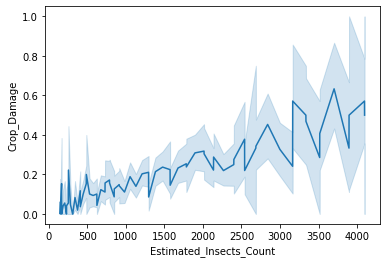

In [24]:
sns.lineplot(x='Estimated_Insects_Count',y='Crop_Damage',data=train)

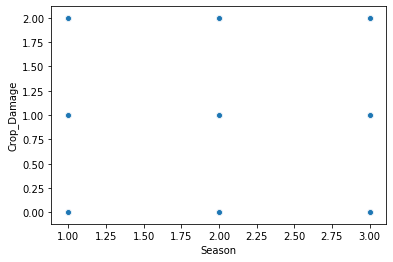

In [25]:
sns.scatterplot(x='Season',y='Crop_Damage',data=train)

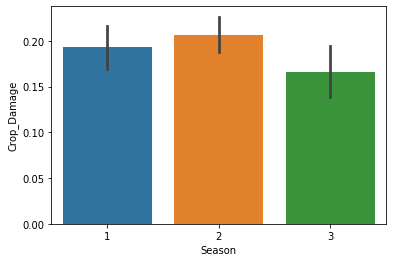

In [26]:
sns.barplot(x='Season',y='Crop_Damage',data=train)

##UNIVARIATE ANALYSIS

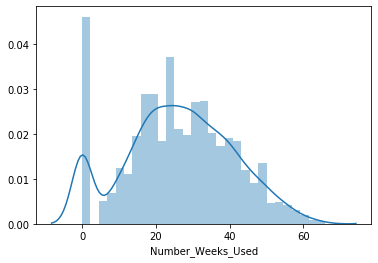

In [27]:
sns.distplot(train['Number_Weeks_Used'].dropna())

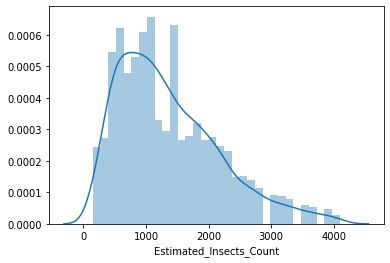

In [28]:
sns.distplot(train['Estimated_Insects_Count'])
plt.show()

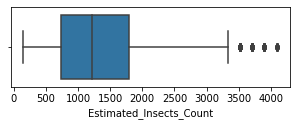

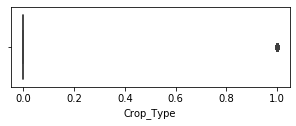

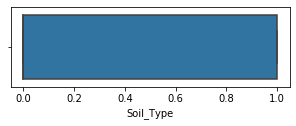

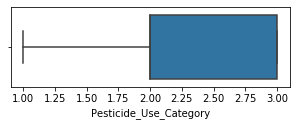

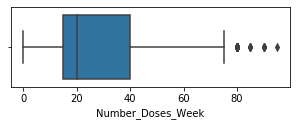

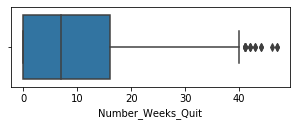

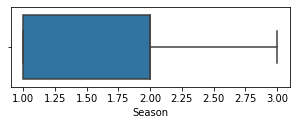

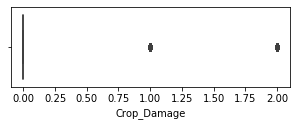

In [29]:
#training data
for i in train.columns:
    if train[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.boxplot(train[i])

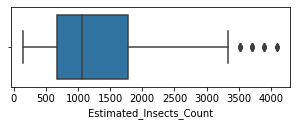

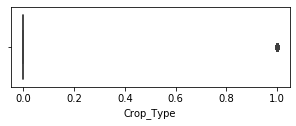

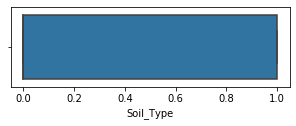

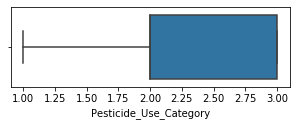

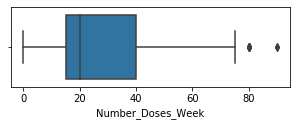

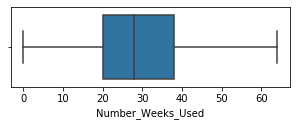

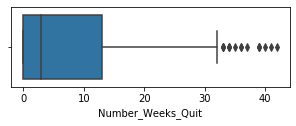

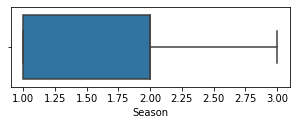

In [30]:
for i in test.columns:
    if test[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.boxplot(test[i])

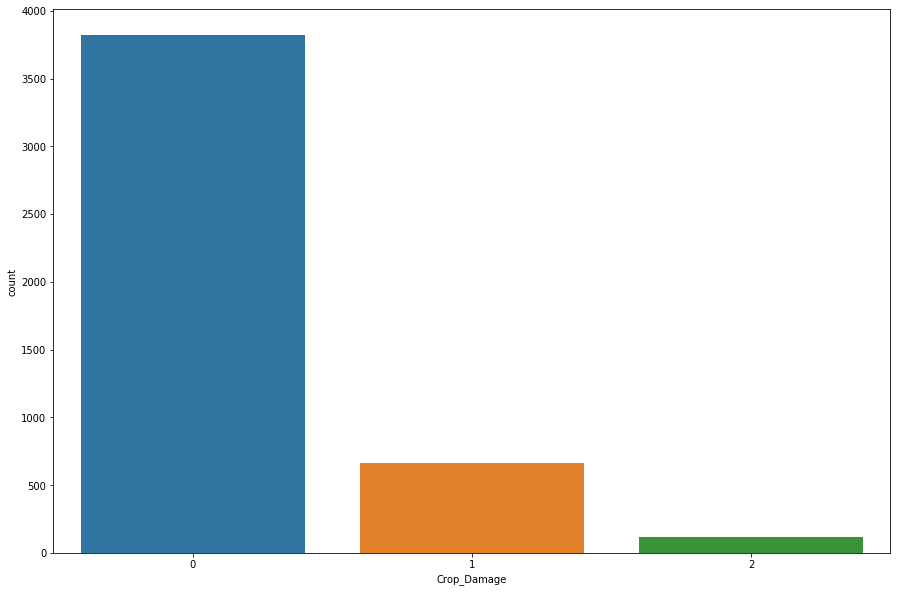

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(train.Crop_Damage)
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

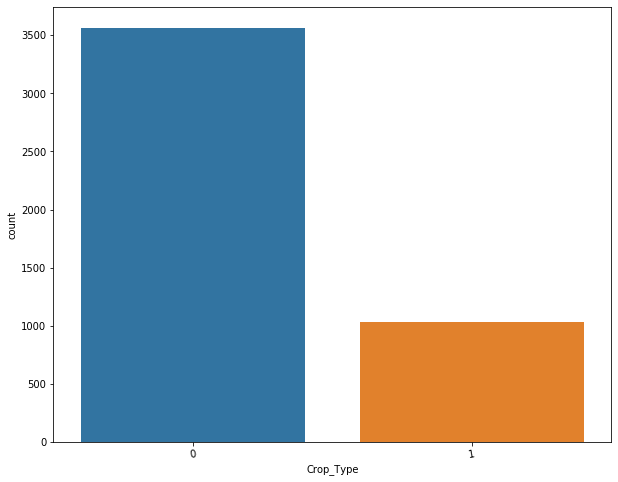

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(train.Crop_Type)
plt.xticks(rotation=10)

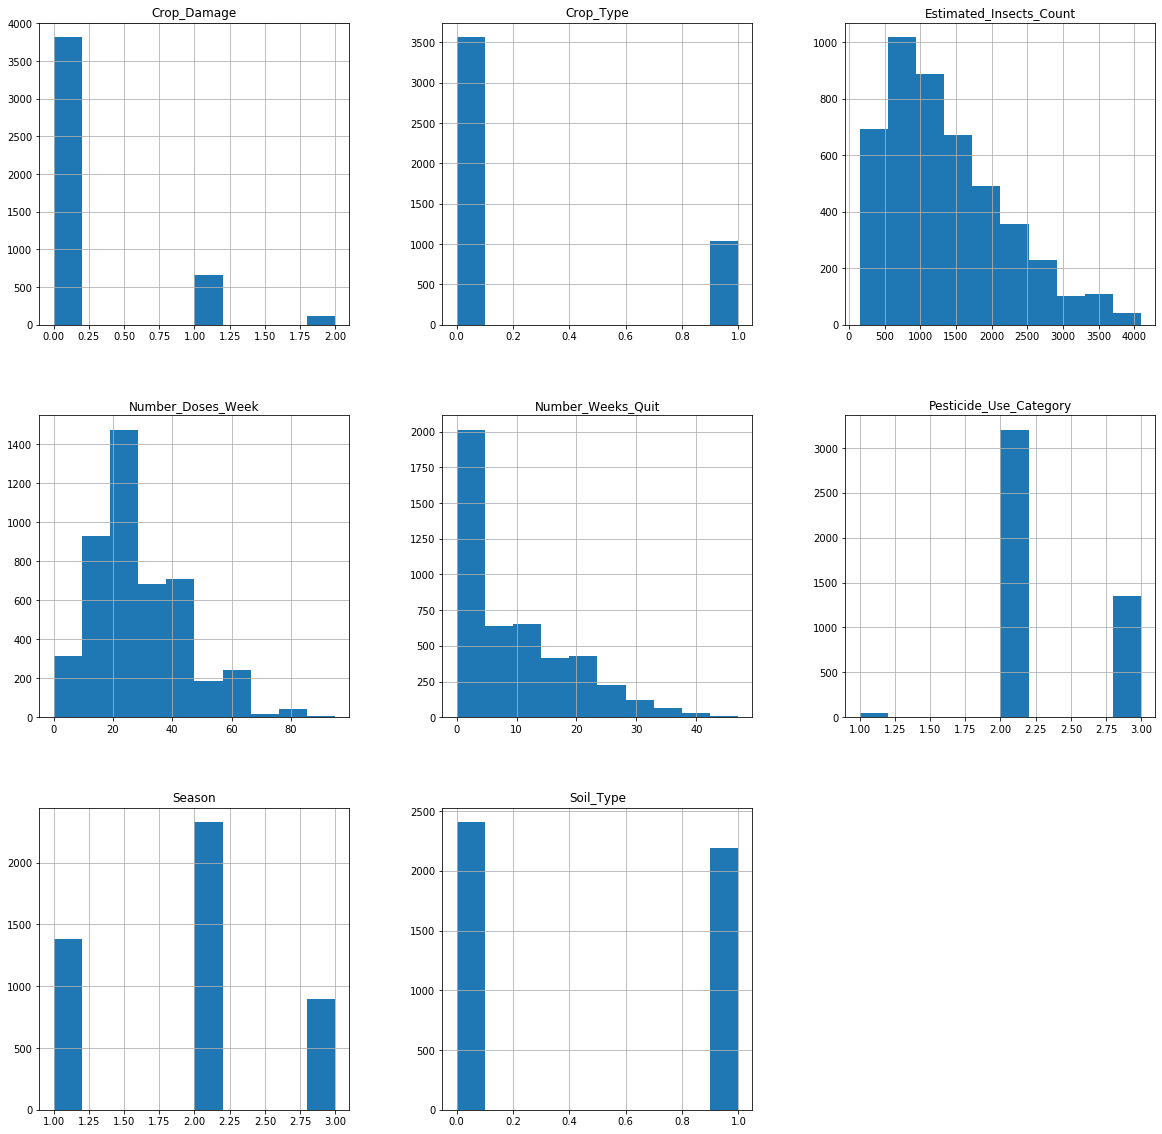

In [33]:
train.hist(figsize=(20,20))
plt.show()

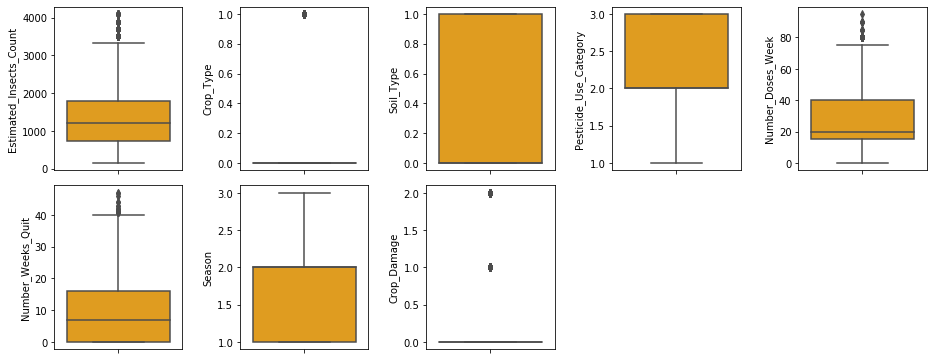

In [34]:
col_list=train.columns.values
plt.figure(figsize=(15,15))
for i in range (0,len(col_list)):
    if train[col_list[i]].dtype!='O':
        plt.subplot(6,6,i+1)
        sns.boxplot(train[col_list[i]], color='orange',orient='v')
        plt.tight_layout()

##statistical Analysis

In [35]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,47.000000,3.000000,2.000000


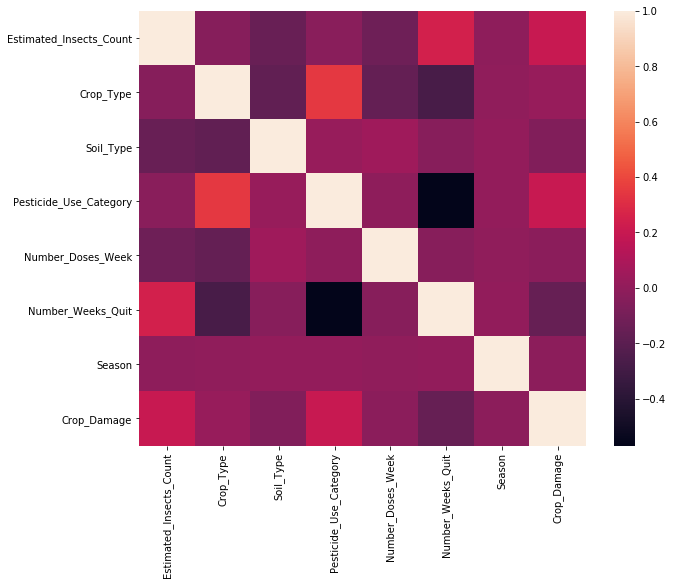

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr())

In [37]:
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,-0.032381,-0.003768,-0.018363
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,-0.152918,-0.016196,1.000000


Observations-
-crop_damage is negatively corr with season, number_weeks_quilt,number_doses_week,soil_type,ID but positively corr with all other attributes.

In [38]:
#we can drop the ID column
train.drop(['ID'], axis=1, inplace=True)

In [39]:
test.drop(['ID'], axis=1, inplace=True)

In [40]:
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [41]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,0,1,0
1,209,1,0,1,0,0,0,2,1
2,257,1,0,1,0,0,0,2,1
3,257,1,1,1,0,0,0,2,1
4,342,1,0,1,0,0,0,2,1


In [42]:
train.dtypes

Estimated_Insects_Count     int64
Crop_Type                   int64
Soil_Type                   int64
Pesticide_Use_Category      int64
Number_Doses_Week           int64
Number_Weeks_Used          object
Number_Weeks_Quit           int64
Season                      int64
Crop_Damage                 int64
dtype: object

In [43]:
train['Number_Weeks_Used']=train['Number_Weeks_Used'].astype(int)

In [44]:
train.dtypes

Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int64
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int64
dtype: object

In [45]:
train["Crop_Damage"]

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4599, dtype: int64

In [46]:
##Crop_Damage=train.groupby('Crop_Damage').mean()
##Crop_Damage

In [47]:
train.shape

(4599, 9)

In [48]:
test.shape

(1199, 8)

##Removing the outliers

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(train))
print("The shape before removing the zscore", train.shape)
train=train[(z<3).all(axis=1)]
print("The shape after removing the zscore", train.shape)

The shape before removing the zscore (4599, 9)
The shape after removing the zscore (4376, 9)


#removing skewness


In [50]:
train.skew()

Estimated_Insects_Count    0.794068
Crop_Type                  1.309105
Soil_Type                  0.078698
Pesticide_Use_Category     0.749111
Number_Doses_Week          0.712831
Number_Weeks_Used         -0.001753
Number_Weeks_Quit          0.815099
Season                     0.142340
Crop_Damage                1.997716
dtype: float64

In [51]:
#using sqrt function to remove the skewness
for i in train.columns:
    if train.skew()[i]>0.55:
        train[i]=np.sqrt(train[i])

In [52]:
train.skew()

Estimated_Insects_Count    0.182991
Crop_Type                  1.309105
Soil_Type                  0.078698
Pesticide_Use_Category     0.584715
Number_Doses_Week         -0.095007
Number_Weeks_Used         -0.001753
Number_Weeks_Quit          0.009398
Season                     0.142340
Crop_Damage                1.997716
dtype: float64

##Splitting data into target and input

In [53]:
train["Crop_Damage"]

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4594    1.0
4595    1.0
4596    0.0
4597    0.0
4598    0.0
Name: Crop_Damage, Length: 4376, dtype: float64

In [57]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train['Crop_Damage']=lb.fit_transform(train['Crop_Damage'])

In [58]:
train.head(5)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,13.711309,1.0,0,1.0,0.0,0,0.0,1,0
1,14.456832,1.0,0,1.0,0.0,0,0.0,2,1
2,16.031220,1.0,0,1.0,0.0,0,0.0,2,1
3,16.031220,1.0,1,1.0,0.0,0,0.0,2,1
4,18.493242,1.0,0,1.0,0.0,0,0.0,2,1


In [59]:
x=train.drop('Crop_Damage', axis=1)
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,13.711309,1.0,0,1.0,0.0,0,0.0,1
1,14.456832,1.0,0,1.0,0.0,0,0.0,2
2,16.031220,1.0,0,1.0,0.0,0,0.0,2
3,16.031220,1.0,1,1.0,0.0,0,0.0,2
4,18.493242,1.0,0,1.0,0.0,0,0.0,2


In [60]:
y=pd.DataFrame(train.Crop_Damage)
y.head()

,Crop_Damage
0,0
1,1
2,1
3,1
4,1


In [61]:
print(x.shape)
print('\n')
print(y.shape)

(4376, 8)


(4376, 1)


In [63]:
train['Crop_Damage'].value_counts()

0    3734
1     642
Name: Crop_Damage, dtype: int64

##Importing necessary Libraries

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [65]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=42,test_size=0.20)

In [66]:
train_x.shape

(3500, 8)

In [67]:
train_y.shape

(3500, 1)

In [68]:
test_x.shape

(876, 8)

In [69]:
test_y.shape

(876, 1)

In [70]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
lr.score(train_x,train_y)
lr.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [72]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.8458904109589042
The accuracy score at r_state 43 is 0.8527397260273972
The accuracy score at r_state 44 is 0.8424657534246576
The accuracy score at r_state 45 is 0.8470319634703196
The accuracy score at r_state 46 is 0.8493150684931506
The accuracy score at r_state 47 is 0.841324200913242
The accuracy score at r_state 48 is 0.843607305936073
The accuracy score at r_state 49 is 0.8538812785388128
The accuracy score at r_state 50 is 0.8504566210045662
The accuracy score at r_state 51 is 0.8493150684931506
The accuracy score at r_state 52 is 0.863013698630137
The accuracy score at r_state 53 is 0.8458904109589042
The accuracy score at r_state 54 is 0.865296803652968
The accuracy score at r_state 55 is 0.8721461187214612
The accuracy score at r_state 56 is 0.8481735159817352
The accuracy score at r_state 57 is 0.8447488584474886
The accuracy score at r_state 58 is 0.8481735159817352
The accuracy score at r_state 59 is 0.865296803652968
The accuracy sc

0.8801369863013698

In [73]:
cvscore=cross_val_score(lg,x,y,cv=5).mean()
print(cvscore)

0.8430139595564252


In [74]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [78]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

In [79]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.8721461187214612

The cross val score is 0.8430139595564252

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       763
           1       0.55      0.05      0.10       113

    accuracy                           0.87       876
   macro avg       0.71      0.52      0.51       876
weighted avg       0.83      0.87      0.82       876


[[758   5]
 [107   6]]

roc_auc_score 0.5232721325925841


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
     

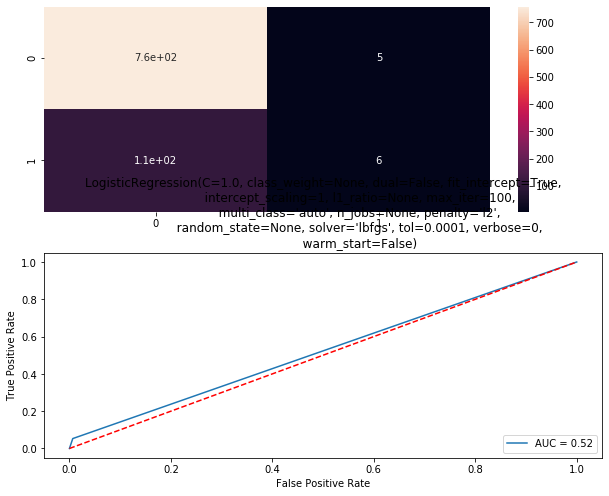

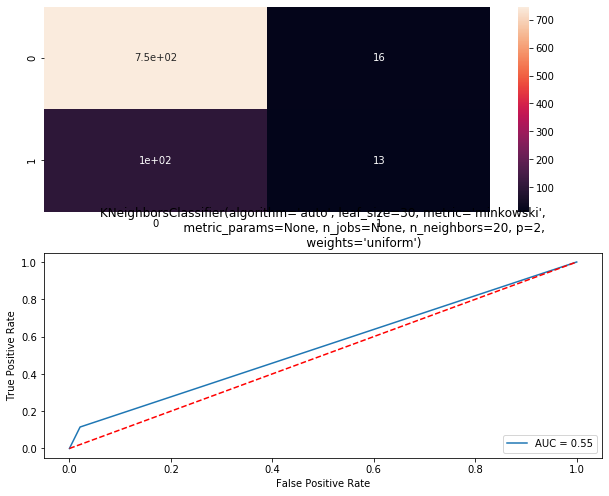

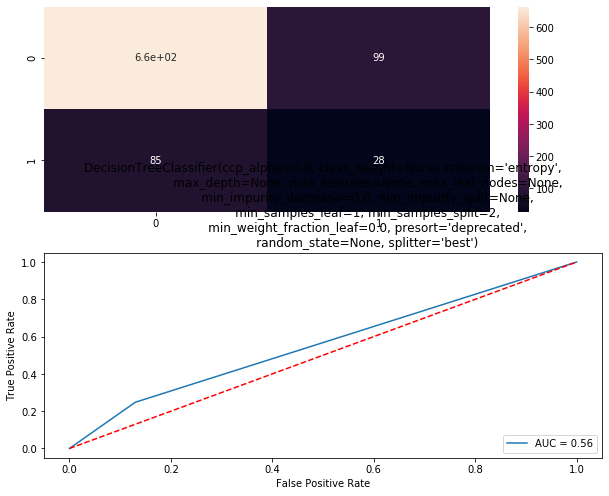

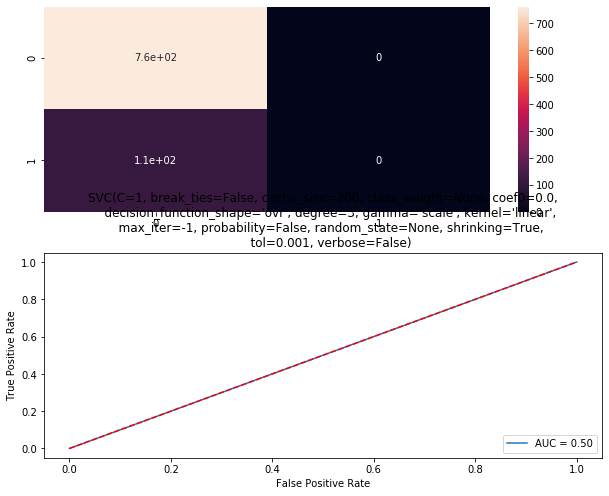

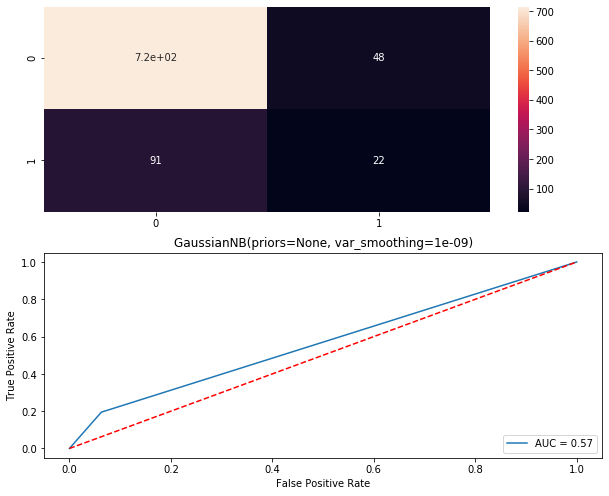

In [81]:
score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='linear'),gb]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [82]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.872146,0.843014,0.523272
1,<class 'sklearn.neighbors._classification.KNei...,0.867580,0.850550,0.547037
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.789954,0.754345,0.559018
3,<class 'sklearn.svm._classes.SVC'>,0.871005,0.853291,0.500000
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.841324,0.787752,0.565890


In [84]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
acc_score=accuracy_score(test_y,pred)
crossval=cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean()
print("The accuracy score is", acc_score)
print("The cross validation score is", crossval)
pd.DataFrame(pred).to_csv("Agriculture_predict.csv")

The accuracy score is 0.8721461187214612
The cross validation score is 0.8430139595564252


In [87]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=70,test_size=0.20)
kn=KNeighborsClassifier(algorithm='auto', n_neighbors= 20, weights='uniform')
kn.fit(train_x,train_y)
pred=kn.predict(test_x)
ascore=accuracy_score(test_y,pred)
print("The accuracy score is", ascore)
cs=cross_val_score(kn,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("Agriculture_predict.csv")

The accuracy score is 0.8481735159817352
The cross val score is 0.8505495107632095


In [88]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=70,test_size=0.20)
sv=SVC(C=1, kernel='linear')
sv.fit(train_x,train_y)
pred=sv.predict(test_x)
ascore=accuracy_score(test_y,pred)
print("The accuracy score is", ascore)
cs=cross_val_score(sv,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("Agriculture_predict.csv")

The accuracy score is 0.8504566210045662
The cross val score is 0.8532908023483365


#from above we can see that svc is best model for this dataset

In [90]:
#saving the model
from sklearn.externals import joblib
joblib.dump(sv,"Agriculture_predict.pkl")

['Agriculture_predict.pkl']